In [1]:
library(xml2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
get_reactivity_values <- function(path,name) {
    xml_file <- read_xml(path)
    reactivity_values <- xml_text(xml_find_all(xml_file, "//reactivity"))
    
    print("fetching values")
# Split the values by commas
    reactivity_values <- strsplit(reactivity_values[[1]], ",")

# Convert the values to a dataframe
print("converting to df")
    reactivity_df <- data.frame(Reactivity = unlist(reactivity_values))

# Replace "NaN" values with 0
    reactivity_df$Reactivity[reactivity_df$Reactivity == "NaN"] <- 0

# Convert the column to numeric
    reactivity_df$Reactivity <- as.numeric(reactivity_df$Reactivity)


    colnames(reactivity_df) <- name
    return(as.data.frame(reactivity_df))
}



In [20]:
list.files("./bams")

[1] "DMS_Vehicle_output"        "DMS_Zota_output"          
[3] "DMS-Vehicle1_S193.srt.bam" "DMS-Vehicle2_S194.srt.bam"
[5] "DMS-Vehicle3_S195.srt.bam" "DMS-Zota1_S196.srt.bam"   
[7] "DMS-Zota2_S197.srt.bam"

In [7]:
Vehicle_reactivities <- cbind(get_reactivity_values("./bams/DMS_Vehicle_output/DMS-Vehicle1_S193.srt_norm/AR_5UTR.xml","Veh_1"),
      #get_reactivity_values("./bams/DMS_Vehicle_output/DMS-Vehicle2_S194.srt_norm/AR_5UTR.xml","Veh_2"),
      get_reactivity_values("./bams/DMS_Vehicle_output/DMS-Vehicle3_S195.srt_norm/AR_5UTR.xml","Veh_3")
      ) %>% as.data.frame()

[1] "fetching values"
[1] "converting to df"
[1] "fetching values"
[1] "converting to df"


In [10]:
Vehicle_reactivities %>% head()


,Veh_1,Veh_3
,<dbl>,<dbl>
1,0.003,0.077
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
5,0.000,0.000
6,0.154,0.566


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


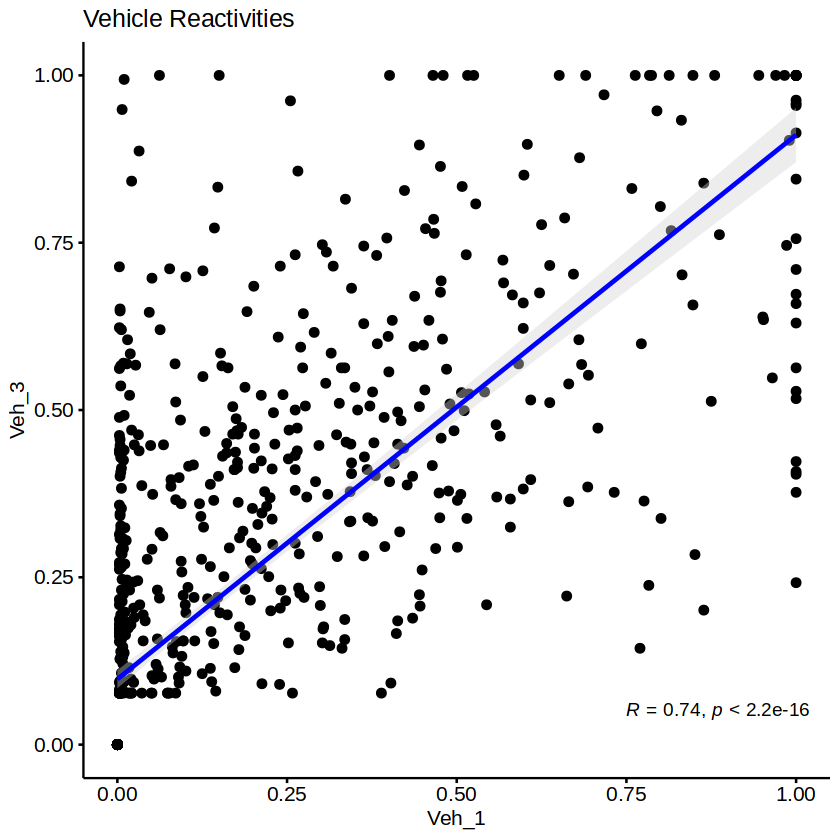

In [37]:
library(ggpubr)

ggscatter(Vehicle_reactivities, x = "Veh_1", y = "Veh_3",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + stat_cor(method = "pearson", label.x = 0.75, label.y = 0.05) + ggtitle("Vehicle Reactivities")

In [38]:
Zota_reactivities <- cbind(get_reactivity_values("./bams/DMS_Zota_output/DMS-Zota1_S196.srt_norm/AR_5UTR.xml","Zota_1"),
      get_reactivity_values("./bams/DMS_Zota_output/DMS-Zota2_S197.srt_norm/AR_5UTR.xml","Zota_2")
)

[1] "fetching values"
[1] "converting to df"
[1] "fetching values"
[1] "converting to df"


In [39]:
head(Zota_reactivities)

,Zota_1,Zota_2
,<dbl>,<dbl>
1,0.046,0.006
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
5,0.000,0.000
6,0.340,0.174


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


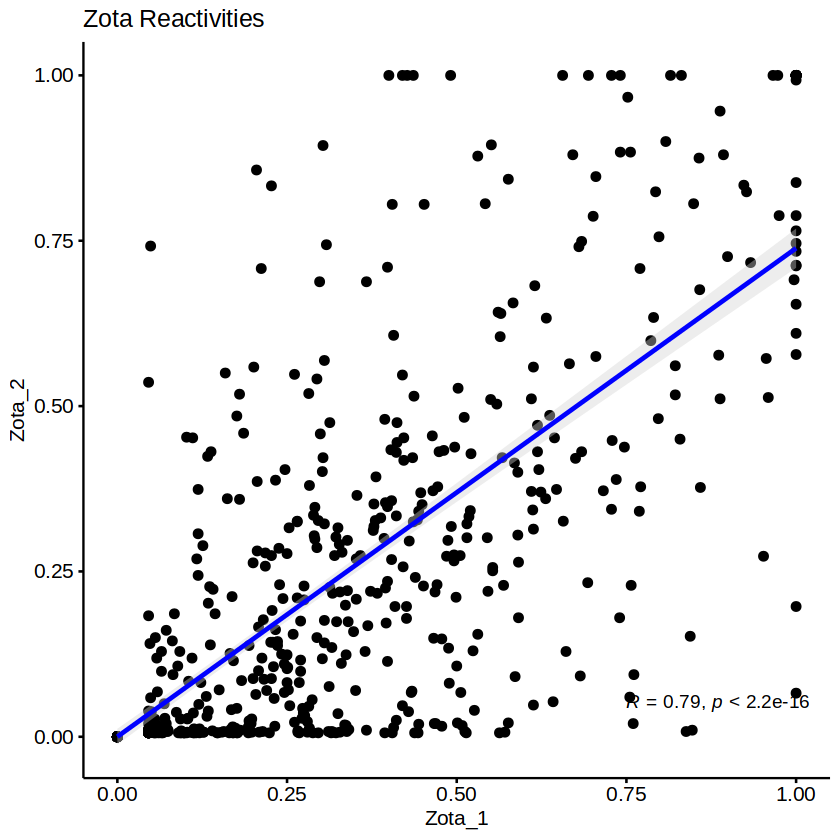

In [40]:
ggscatter(Zota_reactivities, x = "Zota_1", y = "Zota_2",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + stat_cor(method = "pearson", label.x = 0.75, label.y = 0.05) + ggtitle("Zota Reactivities")

In [42]:
reactivities <- cbind(get_reactivity_values("./bams/DMS_Vehicle_output/DMS_Vehicle_combined/AR_5UTR.xml","Vehicle"),
      get_reactivity_values("./bams/DMS_Zota_output/DMS_Zota_combined/AR_5UTR.xml","Zota")
)

[1] "fetching values"
[1] "converting to df"
[1] "fetching values"
[1] "converting to df"


In [43]:
reactivities %>% head()

,Vehicle,Zota
,<dbl>,<dbl>
1,0.04,0.026
2,0.00,0.000
3,0.00,0.000
4,0.00,0.000
5,0.00,0.000
6,0.36,0.257


In [44]:
reactivities$nt <- 1:nrow(reactivities)

Warning message in viridis(3, option = "I"):
“Option 'I' does not exist. Defaulting to 'viridis'.”
Warning message:
“Removed 21 rows containing missing values (`position_stack()`).”


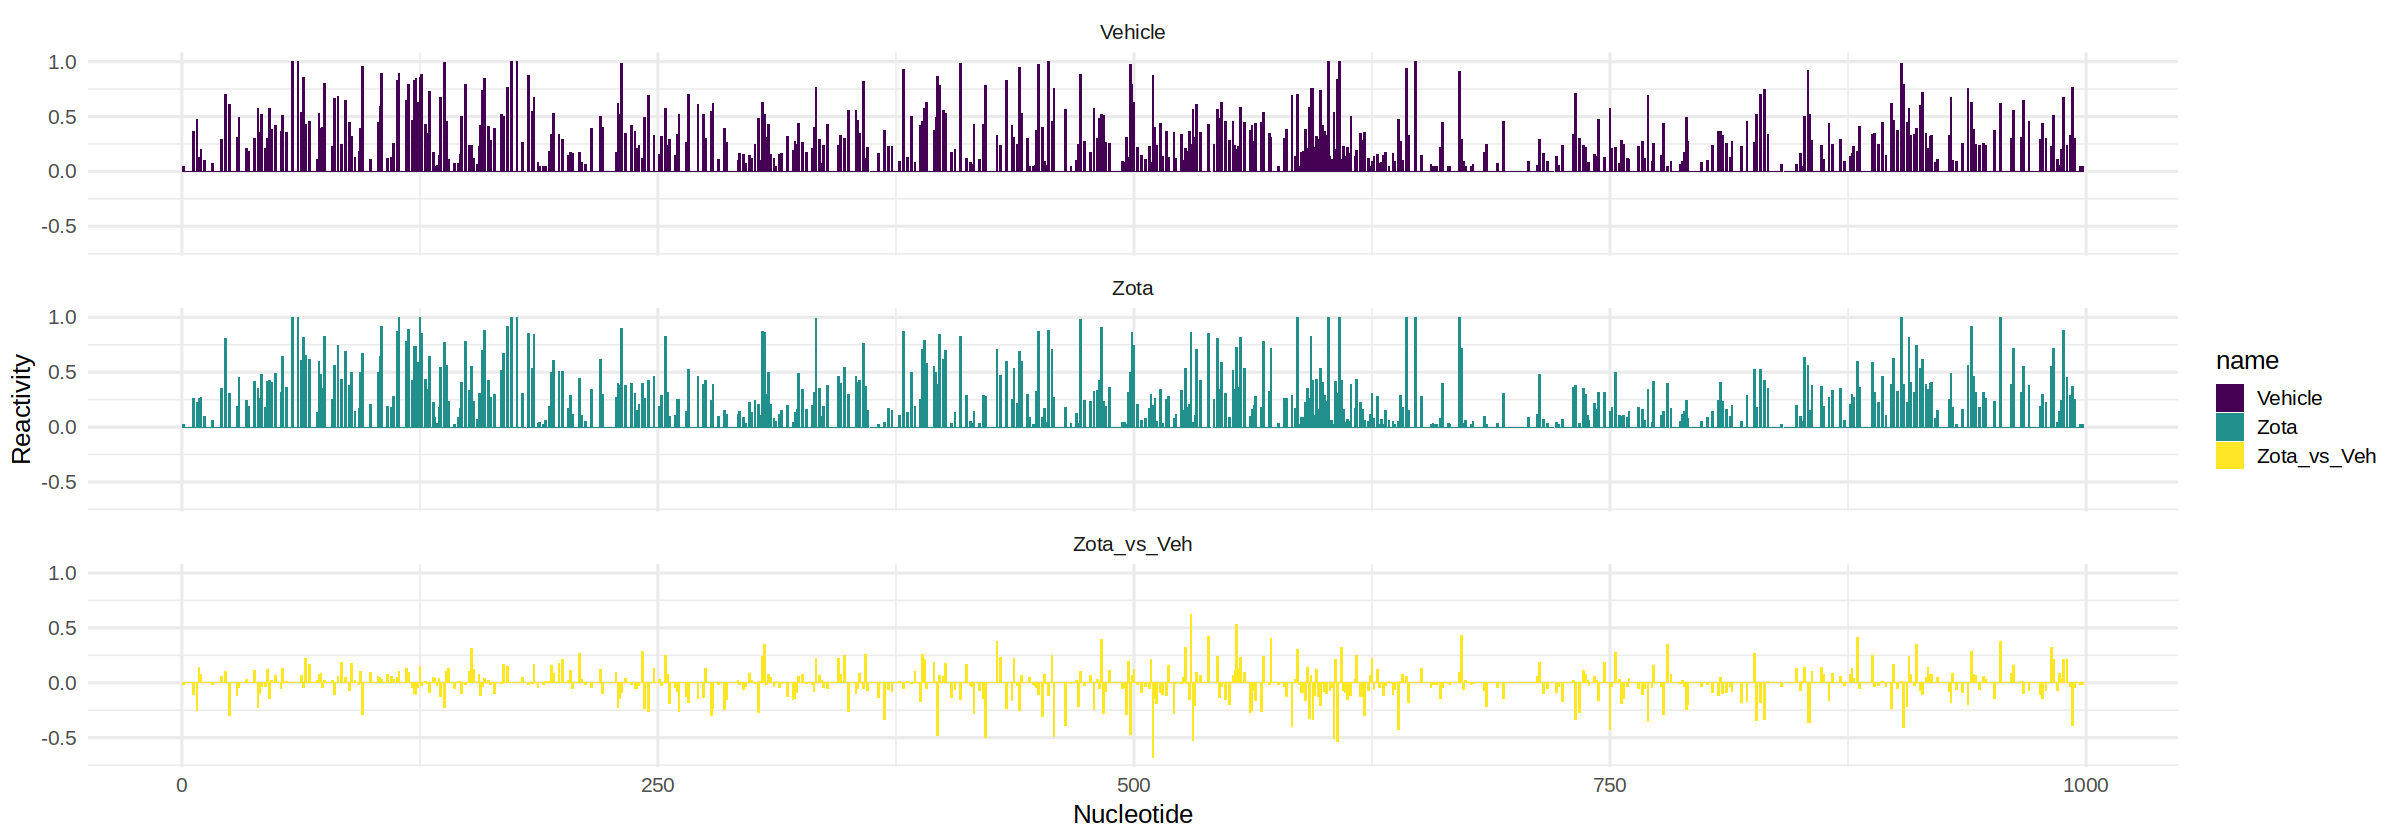

In [60]:
reactivity_long <- tidyr::pivot_longer(reactivities, cols = c("Vehicle","Zota","Zota_vs_Veh"), values_to = "Reactivity")
library(viridis)

# Set the Simpson-themed color palette
simpsons_palette <- viridis(3, option = "I")

# Update the ggplot code
options(repr.plot.width=20)
ggplot(reactivity_long, aes(x = nt, y = Reactivity, fill = name)) +
  geom_bar(stat = "identity") +  # Add black outlines
  facet_wrap(~ name, ncol = 1) +
  labs(x = "Nucleotide", y = "Reactivity") +
  theme_minimal(base_size = 15) +
  scale_fill_manual(values = simpsons_palette) 

In [46]:
reactivities <- reactivities %>% mutate(Zota_vs_Veh = Zota - Vehicle)

In [49]:
reactivities$base <- stringr::str_split('CGGGGAGCCAGCTTGCTGGGAGAGCGGGACGGTCCGGAGCAAGCCCAGAGGCAGAGGAGGCGACAGAGGGAAAAAGGGCCGAGCTAGCCGCTCCAGTGCTGTACAGGAGCCGAAGGGACGCACCACGCCAGCCCCAGCCCGGCTCCAGCGACAGCCAACGCCTCTTGCAGCGCGGCGGCTTCGAAGCCGCCGCCCGGAGCTGCCCTTTCCTCTTCGGTGAAGTTTTTAAAAGCTGCTAAAGACTCGGAGGAAGCAAGGAAAGTGCCTGGTAGGACTGACGGCTGCCTTTGTCCTCCTCCTCTCCACCCCGCCTCCGTCGGCCCAGCGCTGCCAGCCCGAGTTTGCAGAGAGGTAACTCCCTTTGGCTGCGAGCGGGCGAGCTAGCTGCACATTGCAAAGAAGGCTCTTAGGAGCCAGGCGACTGGGGAGCGGCTTCAGCACTGCAGCCACGACCCGCCTGGTTAGGCTGCACGCGGAGAGAACCCTCTGTTTTCCCCCACTCTCTCTCCACCTCCTCCTGCCTTCCCCACCCCGAGTGCGGAGCCAGAGATCAAAAGATGAAAAGGCAGTCAGGTCTTCAGTAGCCAAAAAACAAAACAAACAAAAACAAAAAAGCCGAAATAAAAGAAAAAGATAATAACTCAGTTCTTATTTGCACCTACTTCAGTGGACACTGAATTTGGAAGGTGGAGGATTTTGTTTTTTTCTTTTAAGATCTGGGCATCTTTTGAATCTACCCTTCAAGTATTAAGAGACAGACTGTGAGCCTAGCAGGGCAGATCTTGTCCACCGTGTGTCTTCTTCTGCACGAGACTTTGAGGCTGTCAGAGCGCTTTTTGCGTGGTTGCTCCCGCAAGTTTCCTTCTCTGGAGCTTCCCGCAGGTGGGCAGCTAGCTGCAGCGACTACCGCATCATCACAGCCTGTTGAACTCTTCTGAGCAAGAGAAGGGGAGGCGGGGTAAGGGAAGTAGGTGGAAGATTCAGCCAAGCTCAAGGCC',
"",simplify=T) %>% t()

In [41]:
reactivity_long <- tidyr::pivot_longer(reactivities, cols = c("Vehicle","Zota","Zota_vs_Veh"), values_to = "Reactivity")
reactivity_long %>% select(name) %>% unique()

name
<chr>
Vehicle
Zota
Zota_vs_Veh


In [42]:
delta_reactivities <- reactivity_long %>% filter(stringr::str_detect(name,"vs"))

Warning message:
“Removed 7 rows containing missing values (`position_stack()`).”


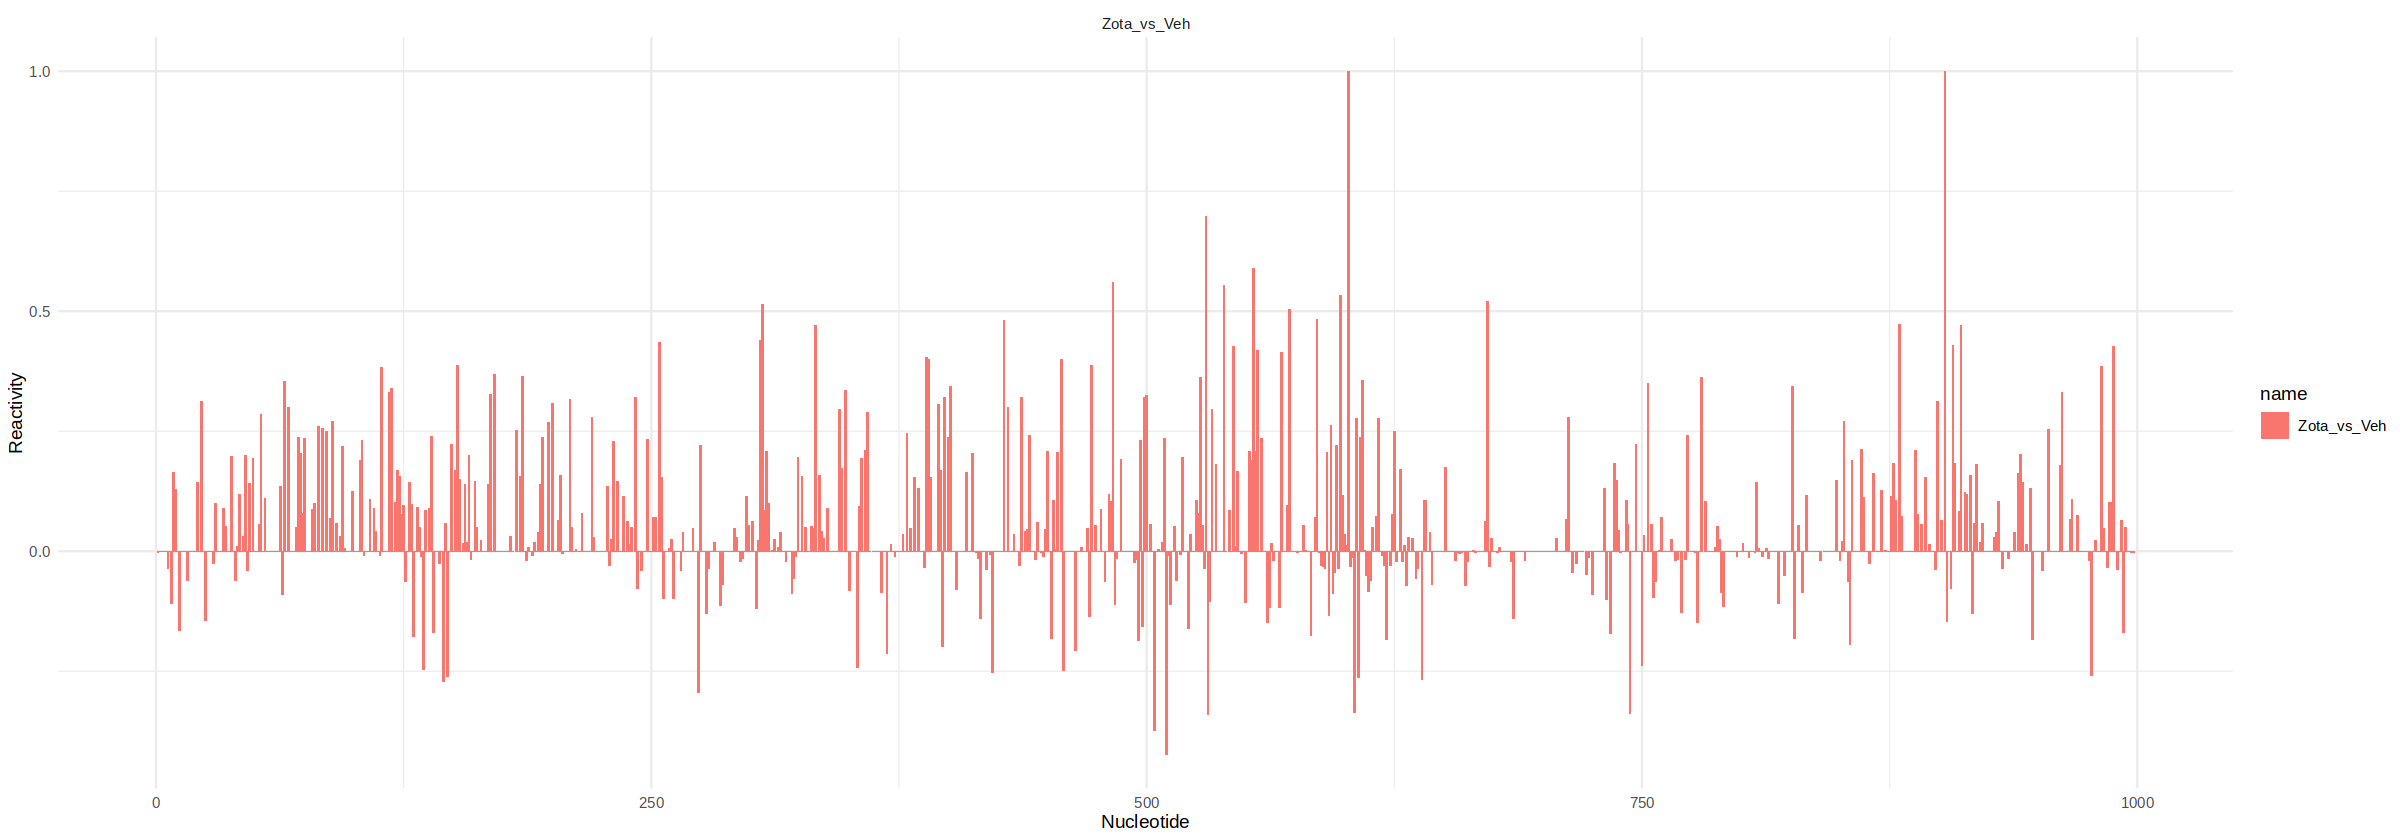

In [44]:
ggplot(delta_reactivities, aes(x = nt, y = Reactivity, fill = name)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ name, ncol = 3) +
  labs(x = "Nucleotide", y = "Reactivity") +
  theme_minimal()

In [63]:
write.csv(reactivities %>% select(c(nt,base,Vehicle,Zota,Zota_vs_Veh)),"AR_5UTR_reactivities.csv")

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Plot DataFrame 1
axs[0].bar(shSCR['index'], shSCR['probability'], color='blue', alpha=0.7)
axs[0].set_ylabel('Probability (shSCR)')
axs[0].set_title('Bar Plots of Probabilities')

# Plot DataFrame 2
axs[1].bar(shRBM42_1['index'], shRBM42_1['probability'], color='green', alpha=0.7)
axs[1].set_ylabel('Probability (shRBM42_1)')

# Plot DataFrame 3
axs[2].bar(shRBM42_4['index'], shRBM42_4['probability'], color='red', alpha=0.7)
axs[2].set_ylabel('Probability (shRBM42_4)')
axs[2].set_xlabel('Index')

plt.tight_layout()
plt.show()